# Test data clustering
Using fuzzy C-means

In [1]:
from dotenv import load_dotenv
import os
import pandas as pd
import numpy as np
load_dotenv()
DATA_PATH = os.getenv("DATAPATH")

weather_df = pd.read_csv(DATA_PATH + "weather_data_4.csv")

In [2]:
import skfuzzy as fuzz

N_CLUSTERS = 4

data_points_df = weather_df[['row', 'col']].groupby(['row', 'col']).count().reset_index()
data_points_df.head() # 320 unique data points

,row,col
0,0,114
1,0,116
2,0,118
3,0,119
4,0,120


In [3]:
# Extract data points
data_points = data_points_df[['row', 'col']].values.T

# Apply fuzzy c-means clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
	data_points, N_CLUSTERS, 2, error=0.005, maxiter=1000, init=None)

# Assign clusters to data points
cluster_labels = np.argmax(u, axis=0)

# Add cluster labels to the dataframe
data_points_df['cluster'] = cluster_labels
data_points_df.head()

,row,col,cluster
0,0,114,2
1,0,116,1
2,0,118,1
3,0,119,1
4,0,120,1


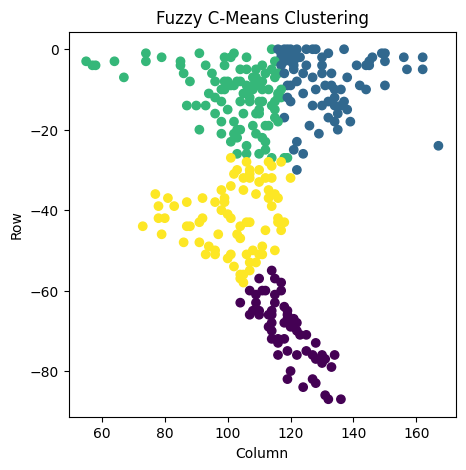

In [4]:
# Plot the clusters
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

plt.scatter(data_points_df['col'], -data_points_df['row'], c=data_points_df['cluster'])
plt.title('Fuzzy C-Means Clustering')
plt.xlabel('Column')
plt.ylabel('Row')
plt.show()

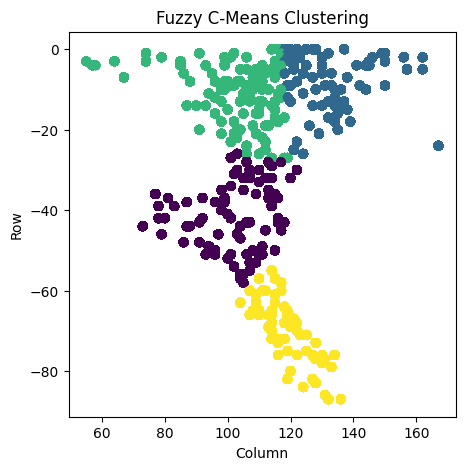

In [7]:
# Extract data points from weather_df
weather_data_points = weather_df[['row', 'col']].values.T

# Apply fuzzy c-means clustering
cntr_weather, u_weather, u0_weather, d_weather, jm_weather, p_weather, fpc_weather = fuzz.cluster.cmeans(
	weather_data_points, N_CLUSTERS, 2, error=0.005, maxiter=1000, init=None)

# Assign clusters to data points
cluster_labels_weather = np.argmax(u_weather, axis=0)

# Add cluster labels to the weather dataframe
weather_df['cluster'] = cluster_labels_weather
weather_df.head()

# Plot the clusters
plt.figure(figsize=(5, 5))

plt.scatter(weather_df['col'], -weather_df['row'], c=weather_df['cluster'])
plt.title('Fuzzy C-Means Clustering')
plt.xlabel('Column')
plt.ylabel('Row')
plt.show()